# Mid-Project | Ironhack 

## Case Study: Housing - Regression

### 1. Get data 

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import datetime
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Get the excel file and convert it into DataFrame

In [2]:
df = pd.read_excel("regression_data.xls")
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


##### Data description


The following table gives an explanation of each column of our dataset. 

| Column name | Description |
| --- | --- | 
| id | unique identification number for the property |
| date | the date the house was sold |
| bedrooms | the number of bedrooms |
| bathrooms | the number of bathrooms |
| sqft_living | living room area before renovations |
| sqft_lot | lotSize area before renovations |
| floors | the number of floors |
| waterfront | the house which has a view to a waterfront |
| view | the number or quality of the views of the house (from 0 (none) to 4 (4 sides or really good view)|
| condition | how good the condition is: 1 indicates worn-out property and 5 excellent |
| grade |  overall grade given to the housing unit, based on the King County grading system: 1 poor, 13 excellent |
| sqft_above | square footage of house apart from the basement |
| sqft_basement | area of the basement |
| yr_built | the year when the house was built |
| yr_renovated | the year when the house was renovated |
| zipcode | the zipcode of the location |
| lat | the latitude of the location |
| long | the longitude of the location |
| sqft_living15 | living room area in 2015, after renovations, this might or might not have affected the lotSize area |
| sqft_lot15 | lotSize area in 2015, after renovations |
| price | the price of the house |

----

### 2. EDA | Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
df.shape

(21597, 21)

##### Descriptive Statistics
Describe the numerical variables

In [6]:
df.describe(include=[np.number])

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


----

### 3. Data Cleaning

#### Check missing values

In [7]:
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### Check for nulls 

In [8]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### Check for duplicates

In [9]:
df.duplicated().sum()

0

Even there are not duplicated rows, would be possible that one house was sold more than once, and in this case the house will be more than once in the data?

In [10]:
# Searching for duplicate ids
df['id'].value_counts()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

In [11]:
# How many repeated houses we have? (how many duplicated 'id')
(df['id'].value_counts() >1).sum()

176

Here we can see that there are some 'ids' or properties repeated in our data, probably as we said before. We will examine each of them in particular.

In [12]:
# Let's start with the id 795000620 that is 3 times repeated
df[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


This house was sold in 3 different dates and with 3 different prices. This is not a problem for our analysis, as we want to predict the price of houses regarding different features such as the year when was sold, so we don't need to drop or modify these rows.

#### Analyse the categorical columns

We will use a function to show some characteristics of all the categorical columns: `bedrooms`, `bathrooms`, `floors`, `waterfront`, `view`, `condition`, `grade` and `zipcode`. 

In [13]:
#Change the selected columns to object type
df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']] = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']].astype(object)

In [14]:
#Check the types
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                 object
bathrooms                object
sqft_living               int64
sqft_lot                  int64
floors                   object
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [15]:
#For each categorical column, print: column name, unique values, number of unique values (%)
categorical=[column for column in df.columns if (df[column].dtype==object)] 
for i in categorical:
    print ('Column: {}'.format(df[i].name)) 
    print('Unique values: {}'.format(len(df[i].unique()))) 
    print(df[i].unique())
    print(df[i].value_counts())
    print(f"{round(df[i].value_counts()/sum(df[i].value_counts())*100,2)}")
    print('\n----------')    

Column: bedrooms
Unique values: 12
[3 2 4 5 1 6 7 8 9 11 10 33]
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
3     45.49
4     31.87
2     12.78
5      7.41
6      1.26
1      0.91
7      0.18
8      0.06
9      0.03
10     0.01
11     0.00
33     0.00
Name: bedrooms, dtype: float64

----------
Column: bathrooms
Unique values: 29
[1.0 2.25 3.0 2.0 4.5 1.5 2.5 1.75 2.75 3.25 4.0 3.5 0.75 4.75 5.0 4.25
 3.75 1.25 5.25 6.0 0.5 5.5 6.75 5.75 8.0 7.5 7.75 6.25 6.5]
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.50       2
6.25       2
6.75       2
8.00       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
2.50    24.9

##### Analyse column `bedrooms`
We see a single property with 33 bedrooms, could be an error, let's check the area of the house.

In [16]:
df[df['bedrooms'] == 33]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


Although 33 bedrooms could be a dormitory or hotel, in 1 single floor and with around 100 sqm has to be an error because it's physically unlikely. It seems to be a typo and it is actually 3 bedrooms.

In [17]:
#Replace error 33 bedrooms
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

In [18]:
#Check that the replacement was done correctly
df['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [19]:
# For the property with 11 bedrooms, all the data makes sense. 
df[df['bedrooms'] == 11]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
8748,1773100755,2014-08-21,11,3.0,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960,520000


##### Analyse the column `bathrooms`

In the following table, the meaning of the unique values of the column `bathrooms` are clarified. Doing some research we find out the meaning of 'quarters' bathrooms.

| Number | Name | Description |
| --- | --- | --- |
| 0.25 | Quarter | Only a toilet, or only a shower (quite uncommon) |
| 0.50 | Half | A toilet and a sink |
| 0.75 | Three-Quarter | A toilet, a sink and a shower/tub (not bidet) |


In order to avoid typo as before, we will check the unique values of `bathrooms`as well. Properties with 8 bathrooms seems to have enough sqft and floors, so all the data are coherent. All the unique values of the rest of categorical variables make sense as well. 

In [20]:
#Let's check the higher unique values of bathrooms too.
df[df['bathrooms'] == 8.0]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
12764,1225069038,2014-05-05,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,2280000


##### Analyse the column `condition`

In the same line, the column `condition` required a small research and explanation. The values represent the following:
- **1-3**: minimum building standards, cabin or inferior structure.
- **4**: older, low quality construction.
- **5**: low construction costs, small and simple design.
- **6**: lowest grade currently meeting building code, low quality materials and simple designs.
- **7**: average grade of construction and design.
- **8**: just above average in construction and design, better materials.
- **9**: better architectural design and quality.
- **10**: high quality features, better design, generally larger square footage. 
- **11**: custom design, higher quality and more luxurious features.
- **12**: custom design and excellent builders and materials.
- **13**: custom designed and built, mansion level.

##### Analyse the column `yr_renovated`

In [21]:
# We want to see the percentage of renovated houses
print(f" Percentage of renovated houses = {round((df['yr_renovated'] !=0).sum() / sum(df['yr_renovated'].value_counts())*100, 2)}%")

 Percentage of renovated houses = 4.23%


In [22]:
(df['yr_renovated'] !=0).sum()

914

#### Dropping irrelevant columns

We will drop the columns that we considered not relevant or not good features for the model. This is the case of `id`, `sqft_living` and `sqft_lot`. The square footage of living and lot are old values, as we have the columns `sqft_living15`and `sqft_lot15`with more recent data of the same parameter.  

In [23]:
df=df.drop(columns=['id', 'sqft_living', 'sqft_lot'], axis=1)

In [24]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


----

### 4. Data Wrangling

We will create a new column with the age of every house, because we consider it's more relevant to our predictions. Then we can drop the columns `yr_built`and `yr_renovated`. 

In [25]:
df1 = pd.DataFrame(2015 - df["yr_built"])

In [26]:
df1 = df1.rename(columns={'yr_built': 'house_year'})

In [27]:
df = pd.concat([df, df1], axis=1)

In [28]:
#drop yr_built and yr_renovated
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_year
0,2014-10-13,3,1.0,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900,60
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000,64
2,2015-02-25,2,1.0,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000,82
3,2014-12-09,4,3.0,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000,50
4,2015-02-18,3,2.0,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000,28


#### Analyse the `date` column

The date column is already in datetime format, so we don't need to change it.

In [29]:
print('Minimum date: ', df['date'].min())
print('Maximum date: ', df['date'].max())

Minimum date:  2014-05-02 00:00:00
Maximum date:  2015-05-27 00:00:00


Our dataset contains data from houses sold between 2014 and 2015, so we decide to extract the month and quarter (not the year) as they will be more interesting for later analysis.

In [30]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['quarter'] = pd.DatetimeIndex(df['date']).quarter

In [31]:
#Convert month and quarter to object type, so we can include them later in the categorical columns.
df[['month', 'quarter']] = df[['month', 'quarter']].astype(object)

Now we will change the `date` column to ordinal, so we can run it within the numerical columns.

In [32]:
df['date']=df['date'].apply(lambda x: x.toordinal())
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_year,month,quarter
0,735519,3,1.0,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900,60,10,4
1,735576,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000,64,12,4
2,735654,2,1.0,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000,82,2,1
3,735576,4,3.0,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000,50,12,4
4,735647,3,2.0,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000,28,2,1


In [33]:
#Check that the type change is done
df.dtypes

date               int64
bedrooms          object
bathrooms         object
floors            object
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement      int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
house_year         int64
month             object
quarter           object
dtype: object

#### Analyse the numerical columns

In [34]:
#Get all numerical columns in a new dataframe
numerical = df._get_numeric_data()
numerical

,date,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,house_year
0,735519,1180,0,47.5112,-122.257,1340,5650,221900,60
1,735576,2170,400,47.7210,-122.319,1690,7639,538000,64
2,735654,770,0,47.7379,-122.233,2720,8062,180000,82
3,735576,1050,910,47.5208,-122.393,1360,5000,604000,50
4,735647,1680,0,47.6168,-122.045,1800,7503,510000,28
...,...,...,...,...,...,...,...,...,...
21592,735374,1530,0,47.6993,-122.346,1530,1509,360000,6
21593,735652,2310,0,47.5107,-122.362,1830,7200,400000,1
21594,735407,1020,0,47.5944,-122.299,1020,2007,402101,6
21595,735614,1600,0,47.5345,-122.069,1410,1287,400000,11


In [35]:
numerical.describe()

,date,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,house_year
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,735535.180997,1788.596842,291.725008,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05,44.000324
std,113.059987,827.759761,442.667800,0.138552,0.140724,685.230472,27274.441950,3.673681e+05,29.375234
min,735355.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,0.000000
25%,735436.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,18.000000
50%,735522.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,40.000000
75%,735646.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,64.000000
max,735745.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,115.000000


----

### 5. EDA : Exploratory data analysis

#### Check the numerical variable normality visually

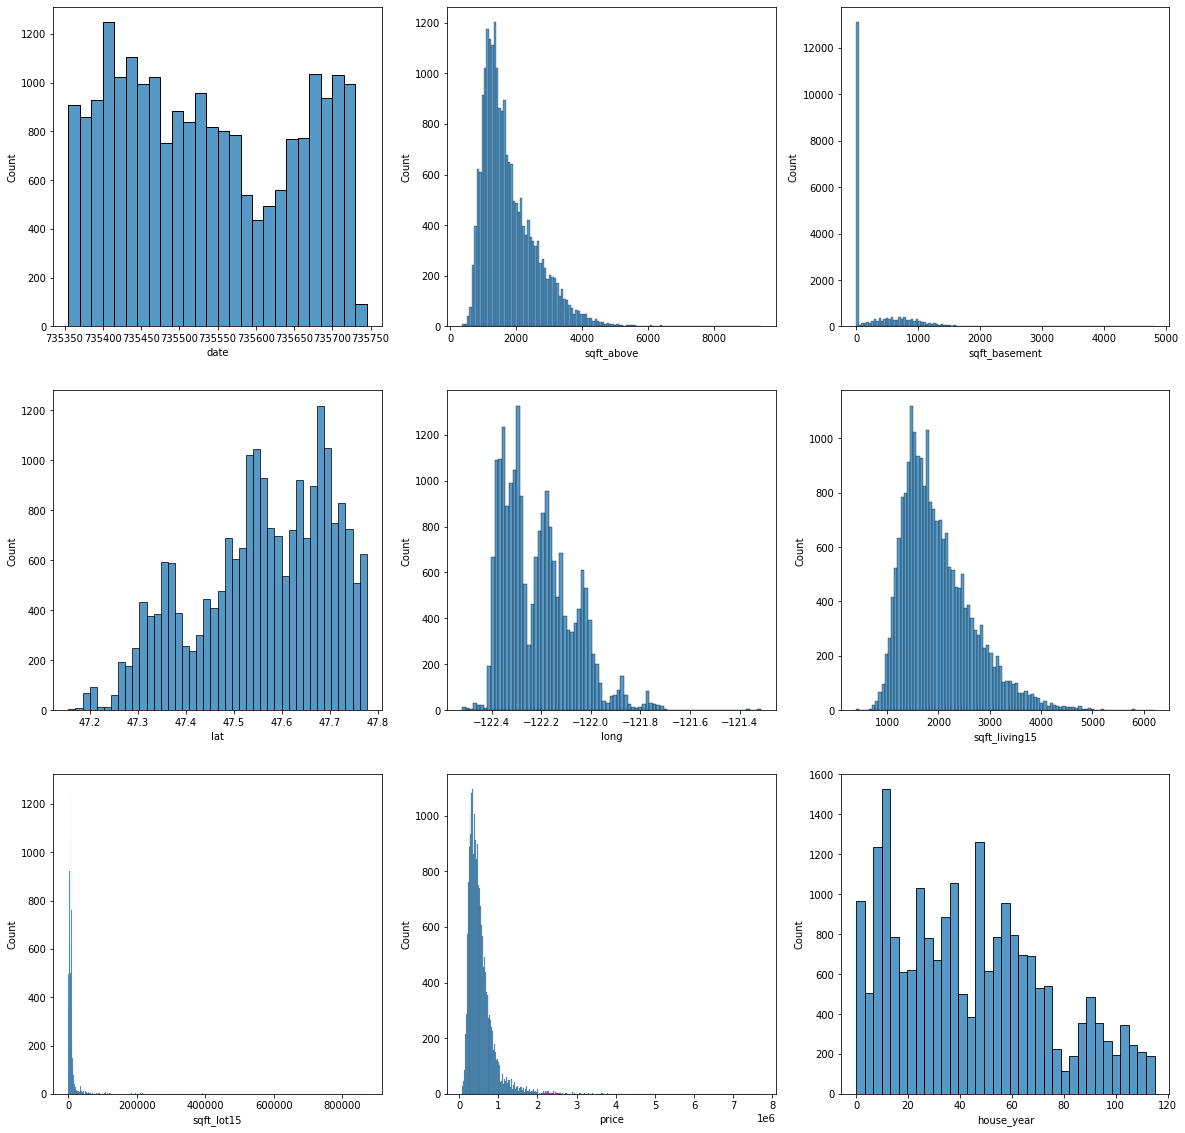

In [36]:
# Plot histograms for every numerical column
plt.figure(figsize=(20,20))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(numerical[column]);

#### Check the categorical variables visually

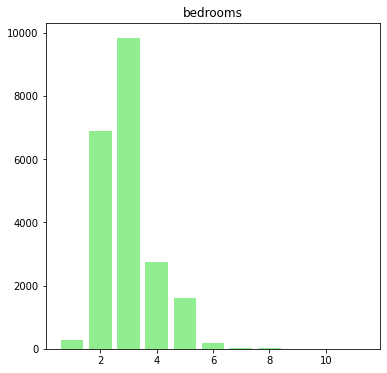

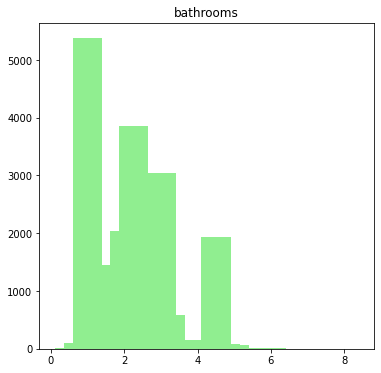

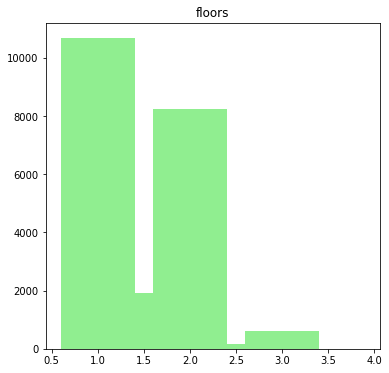

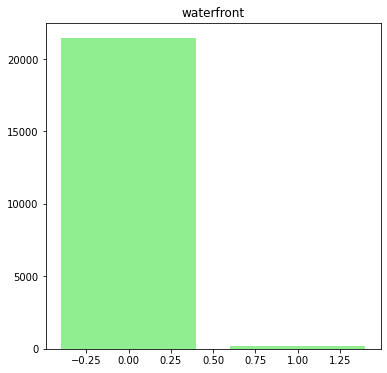

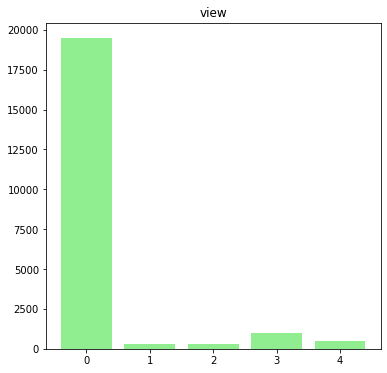

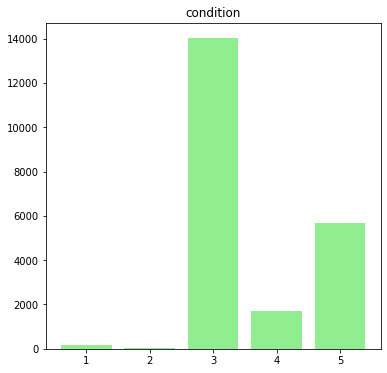

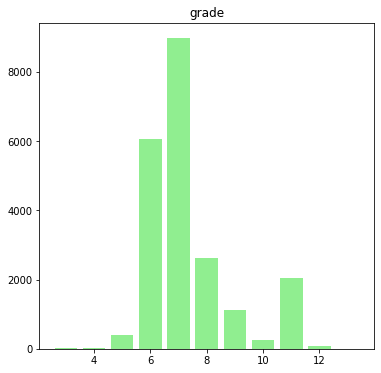

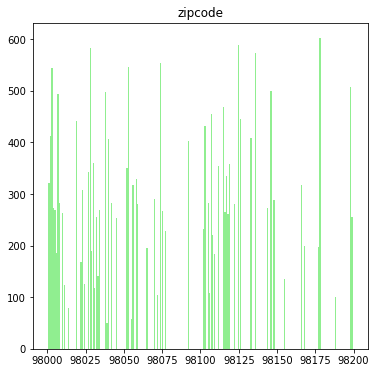

In [37]:
#Barplot for every categorical column
for i in categorical:
    plt.figure(figsize=(6,6))
    plt.bar(df[i].unique(), df[i].value_counts(), color="lightgreen")
    plt.title(i)
    plt.show();

#### Check for multicolinearity

(9.5, -0.5)

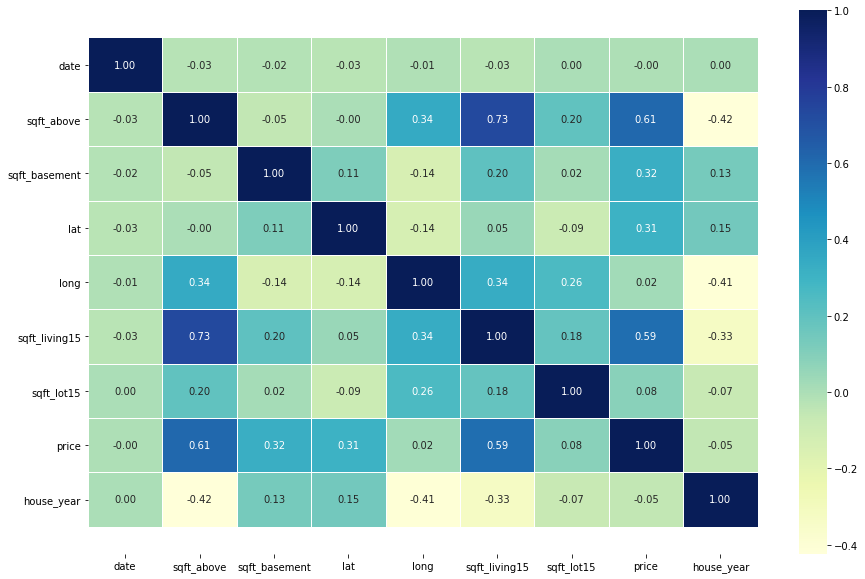

In [38]:
#plot correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Export the clean dataset

In [39]:
#Export to csv
df.to_csv("regression_data_clean.csv", index=False)

### 6. Machine Learning Model

Now we will use the Scikit-Learn library and the workflow as follows, to get a model with a good performance. 

<img src="sklearn-workflow-title.png"/>

#### First Model: Linear Regression

Let's train the model now, before applying any pre-processing method, this will be the worst scenario.

In [40]:
#import linear-model from scikit-learn and evaluation metrics, and math library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math

In [41]:
#create a Linear Regression object using the constructor:
lm = LinearRegression()

In this case study, we want to build a ML model to predict the prices of properties based on some different features, so our target variable is the `price` column. The features are the rest of columns of our df, as we have already dropped the irrelevant columns.

In [42]:
#define the predictor and the target variable 
X = df.drop(columns=['price'])
Y = df['price']
X

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_year,month,quarter
0,735519,3,1.0,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,60,10,4
1,735576,3,2.25,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,64,12,4
2,735654,2,1.0,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,2,1
3,735576,4,3.0,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,50,12,4
4,735647,3,2.0,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,735374,3,2.5,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,6,5,2
21593,735652,4,2.5,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,1,2,1
21594,735407,2,0.75,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,6,6,2
21595,735614,3,2.5,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,11,1,1


In [43]:
#check the shapes of both X, Y (because should have both the same number of rows)
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (21597, 18)
Y shape: (21597,)


##### Split into train - test

In [44]:
from sklearn.model_selection import train_test_split

We will use a `random_state` of 40, and a `test_size`of 0.40 ( 60% train, 40% test)  

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=40)

In [46]:
#train the model
model = lm.fit(X_train,Y_train)

In [47]:
#Fit over our train data and predict against X test features
Y_pred= lm.predict(X_test)

Evaluate our model accuracy over `Y_test`- with metrics such as : 
- **R2** : regression score function.
- **MSE**: Mean Squared Error
- **RMSE** : Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
- **MAE** : Mean Absolute Error

In [48]:
print('R2: ', r2_score(Y_test, Y_pred))
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(Y_test, Y_pred)))
print('MAE: ', mae(Y_test, Y_pred))

R2:  0.7053915222820739
MSE: 40186918717.894264
RMSE:  200466.75215080995
MAE:  124932.89684020194


Our accuracy score R2 now is 70,5%, it is relatively close to 1, and the mean absolute error is 124,932 $ so the model performs well, but can be improved.

----

### 7. Pre-processing the data

In order to improve our model and get more accurate results, we will apply some different pre-processing methods:
- **Normalization**: values are rescaled so that they end up ranging between 0 and 1.
- **Standardization**: values are centered around the mean with a unit standard deviation. 
- **Dealing with outliers**

We will now drop `lat` and `long`, as the same information is presented in `zipcode`.

In [49]:
df = df.drop(['lat', 'long'], axis=1)

In [50]:
df.describe()

,date,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,house_year
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,735535.180997,1788.596842,291.725008,1986.620318,12758.283512,5.402966e+05,44.000324
std,113.059987,827.759761,442.667800,685.230472,27274.441950,3.673681e+05,29.375234
min,735355.000000,370.000000,0.000000,399.000000,651.000000,7.800000e+04,0.000000
25%,735436.000000,1190.000000,0.000000,1490.000000,5100.000000,3.220000e+05,18.000000
50%,735522.000000,1560.000000,0.000000,1840.000000,7620.000000,4.500000e+05,40.000000
75%,735646.000000,2210.000000,560.000000,2360.000000,10083.000000,6.450000e+05,64.000000
max,735745.000000,9410.000000,4820.000000,6210.000000,871200.000000,7.700000e+06,115.000000


We need to rescale, as we have different range of values in columns.

#### Standardization

We want to standardise all numeric features so we need first to get the numeric features of the new df.

In [51]:
num = df._get_numeric_data()
X_num = num.drop(columns=['price'])

In [52]:
# rescaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
X_stan = transformer.transform(X_num)
print(X_stan.shape)

(21597, 6)


In [53]:
X_stan

array([[-0.143122  , -0.73525069, -0.65903091, -0.94367562, -0.26062671,
         0.54467809],
       [ 0.36104681,  0.46077619,  0.24460216, -0.43288674, -0.18769961,
         0.68085037],
       [ 1.05096203, -1.23057495, -0.65903091,  1.07029196, -0.17219022,
         1.29362563],
       ...,
       [-1.1337695 , -0.92854796, -0.65903091, -1.41068259, -0.39419807,
        -1.29364769],
       [ 0.69715935, -0.22784535, -0.65903091, -0.84151784, -0.42059702,
        -1.12343234],
       [-0.12543187, -0.92854796, -0.65903091, -1.41068259, -0.41803046,
        -1.25960462]])

#### Normalization

We will preprocess now the categoricals using the OneHotEncoder method

In [54]:
#store categorical features in a new X_cat
X_cat = df.select_dtypes(include = np.object)

In [55]:
from sklearn.preprocessing import OneHotEncoder
X_enc = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
X_enc = X_enc.transform(X_cat).toarray()
X_enc

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

#### Second modelling, now after pre-processing

Now we concatenate both standardized and encoded dataframes in order to get the X for the model.

In [56]:
X = np.concatenate((X_stan, X_enc), axis= 1)

Spliting the data into train and test randomly

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

Linear Regression model

In [58]:
lm = LinearRegression()
model = lm.fit(X_train,Y_train)
Y_pred  = lm.predict(X_test)

#### Additional Evaluation Metrics for LR

In [59]:
print('R2: ', r2_score(Y_test, Y_pred))
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(Y_test, Y_pred)))
print('MAE: ', mae(Y_test, Y_pred))

R2:  0.8442586550939344
MSE: 20906859612.090103
RMSE:  144592.045466167
MAE:  86280.66189924542


Now, we have improved our accuracy score, to 84,4% , so our model now performs better. With a mean absolute error of 86,280 $.

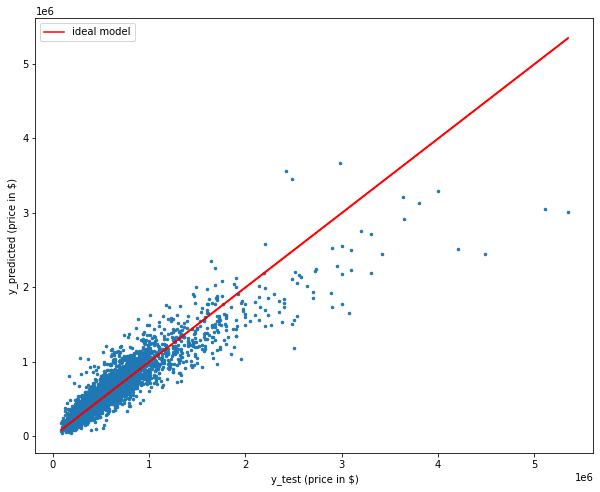

In [60]:
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(Y_test), max(Y_test), num=len(Y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(Y_test, Y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price in $)');
plt.ylabel('y_predicted (price in $)');

- - - - - 

#### Third model

Another iteration now dealing with outliers. First, we will plot the numerical features to find the outliers.

In [61]:
#create a new df3 to apply in this part 
df3 = df
num = df3._get_numeric_data()
X_num = num.drop(columns=['price'])

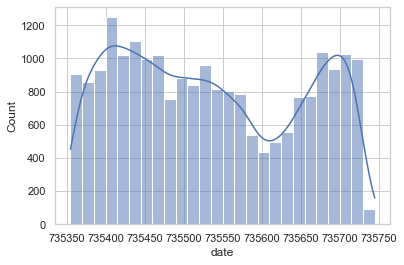

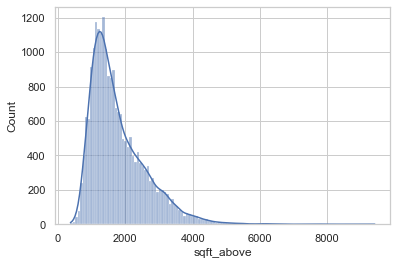

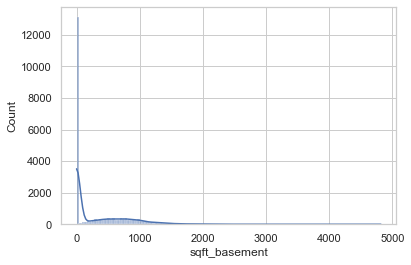

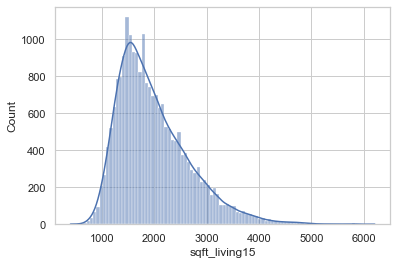

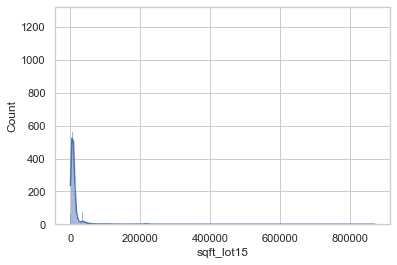

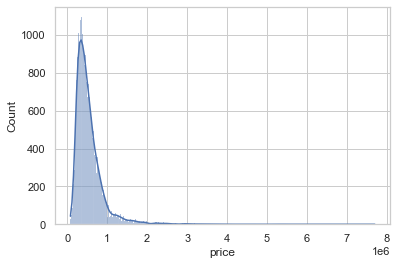

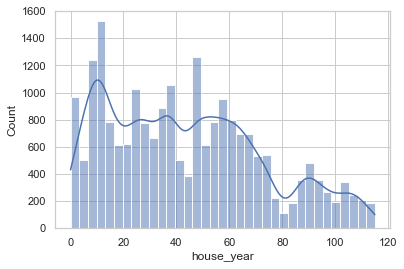

In [62]:
#histogram for every numerical column
for i, col in enumerate(num.columns):
    plt.figure(i)
    sns.set_theme(style="whitegrid")
    sns.histplot(data=num, x=col, kde=True)

##### Logarithm transformation

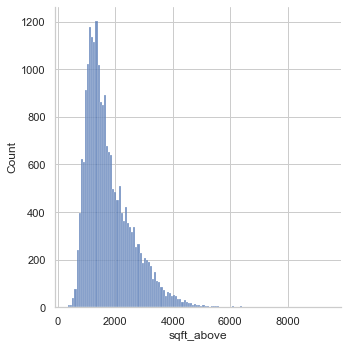

In [63]:
sns.displot(df3['sqft_above'])

In [64]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN   

In [65]:
#replace the NaN with the mean
df3['sqft_above_log'] = list(map(log_transfom_clean_, df3['sqft_above']))
df3['sqft_above_log'] = df3['sqft_above_log'].fillna(np.mean(df3['sqft_above_log']))

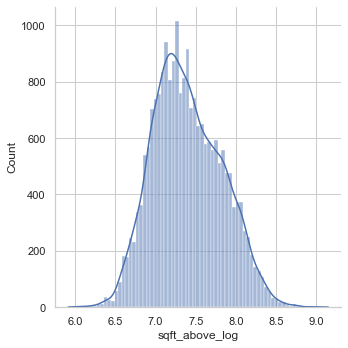

In [66]:
sns.displot(df3['sqft_above_log'], kde=True);

In [67]:
df3['sqft_basement_log'] = list(map(log_transfom_clean_, df3['sqft_basement']))
df3['sqft_basement_log'] = df3['sqft_basement_log'].fillna(np.mean(df3['sqft_basement_log']))

In [68]:
df3['sqft_living15_log'] = list(map(log_transfom_clean_, df3['sqft_living15']))
df3['sqft_living15_log'] = df3['sqft_living15_log'].fillna(np.mean(df3['sqft_living15_log']))

In [69]:
df3.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,house_year,month,quarter,sqft_above_log,sqft_basement_log,sqft_living15_log
0,735519,3,1.0,1.0,0,0,3,7,1180,0,98178,1340,5650,221900,60,10,4,7.073270,6.439042,7.200425
1,735576,3,2.25,2.0,0,0,3,7,2170,400,98125,1690,7639,538000,64,12,4,7.682482,5.991465,7.432484
2,735654,2,1.0,1.0,0,0,3,6,770,0,98028,2720,8062,180000,82,2,1,6.646391,6.439042,7.908387
3,735576,4,3.0,1.0,0,0,5,7,1050,910,98136,1360,5000,604000,50,12,4,6.956545,6.813445,7.215240
4,735647,3,2.0,1.0,0,0,3,8,1680,0,98074,1800,7503,510000,28,2,1,7.426549,6.439042,7.495542


In [70]:
df3 = df3.drop(['sqft_above'], axis=1)
df3 = df3.drop(['sqft_basement'], axis =1)
df3 = df3.drop(['sqft_living15'], axis=1)

#### Normalizer

In [71]:
X_num = df3.select_dtypes(include = np.number)
X_cat = df3.select_dtypes(include = np.object)

In [72]:
X_num = X_num.drop(['price'], axis=1)

In [73]:
X_enco=pd.get_dummies(X_cat, drop_first=True)
X_enco.head()

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_2,quarter_3,quarter_4
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Concatenate

In [74]:
X = np.concatenate((X_num, X_enco), axis= 1)
Y = df['price']
print(X.shape)
print(Y.shape)

(21597, 151)
(21597,)


In [75]:
#spliting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [76]:
lm = LinearRegression()
model = lm.fit(X_train,Y_train)
Y_pred  = lm.predict(X_test)

In [77]:
print('R2: ', r2_score(Y_test, Y_pred))
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(Y_test, Y_pred)))
print('MAE: ', mae(Y_test, Y_pred))

R2:  0.8336792912192215
MSE: 22327043028.685387
RMSE:  149422.3645532535
MAE:  89111.19682229038


Applying the logarithm transformation the model performance has decreased slightly, to a R2 of 83,36% and a mean absolute error of 89,111 $.

Let's plot our model results.

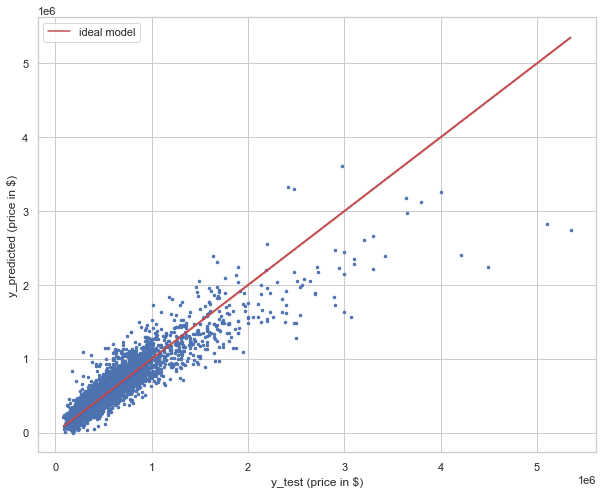

In [78]:
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(Y_test), max(Y_test), num=len(Y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(Y_test, Y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price in $)');
plt.ylabel('y_predicted (price in $)');

------------

#### Fourth modelling: using KNN

#### KNN Model

KNN or K-Nearest Neighbor works on Euclidean distance between the neighbor cordinates X and y to know how similar data is.

In [79]:
categoricals = df.select_dtypes(np.object)
numericals = df.select_dtypes(np.number)
numericals = numericals[['date', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
        'house_year', 'price']]

Standardize numerical columns

In [80]:
#Scaling to the numerical columns except the final column ('price')
transformer = StandardScaler().fit(numericals.iloc[:,:-1])
scaled_numericals = transformer.transform(numericals.iloc[:,:-1])

In [81]:
pdscaled_numericals= pd.DataFrame(scaled_numericals,columns=numericals.columns.tolist()[:-1])

In [82]:
pdscaled_numericals.head()

,date,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_year
0,-0.143122,-0.735251,-0.659031,-0.943676,-0.260627,0.544678
1,0.361047,0.460776,0.244602,-0.432887,-0.187700,0.680850
2,1.050962,-1.230575,-0.659031,1.070292,-0.172190,1.293626
3,0.361047,-0.892305,1.396734,-0.914488,-0.284459,0.204247
4,0.989047,-0.131197,-0.659031,-0.272353,-0.192686,-0.544700


Dummifying categorical columns

In [83]:
cat_encoded = pd.get_dummies(categoricals, drop_first=True)
cat_encoded.head()

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_2,quarter_3,quarter_4
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Concatenate

In [84]:
full = pd.concat([pdscaled_numericals.iloc[:,:-1],cat_encoded,numericals.iloc[:,-1]],axis=1)
full.shape

(21597, 151)

In [85]:
full_x = pd.DataFrame(full,columns=full.columns.tolist()[:-1])
full_x.head()

,date,sqft_above,sqft_basement,sqft_living15,sqft_lot15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,quarter_2,quarter_3,quarter_4
0,-0.143122,-0.735251,-0.659031,-0.943676,-0.260627,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.361047,0.460776,0.244602,-0.432887,-0.187700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1.050962,-1.230575,-0.659031,1.070292,-0.172190,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.361047,-0.892305,1.396734,-0.914488,-0.284459,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.989047,-0.131197,-0.659031,-0.272353,-0.192686,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
X = full_x
y = df['price']

Splitting data intro train and test sets.

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Training the K-NN model

In [88]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=8) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train) 

KNeighborsRegressor(n_neighbors=8)

In [89]:
knn_model.score(X_test,y_test)

0.6179925829120845

Getting our predictions and metrics

In [90]:
knn_pred = knn_model.predict(X_test)

In [91]:
print('R2: ', r2_score(y_test, knn_pred))
print('MSE:', mean_squared_error(y_test, knn_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, knn_pred)))
print('MAE: ', mae(y_test,knn_pred))

R2:  0.6179925829120845
MSE: 51281022676.74171
RMSE:  226453.1357185007
MAE:  132599.97062114198


The R2 of the KNN model is around 62% with a mean absolute error of 132,599 $, so this model performs worse than the linear regression we did before.

Plot our model results.

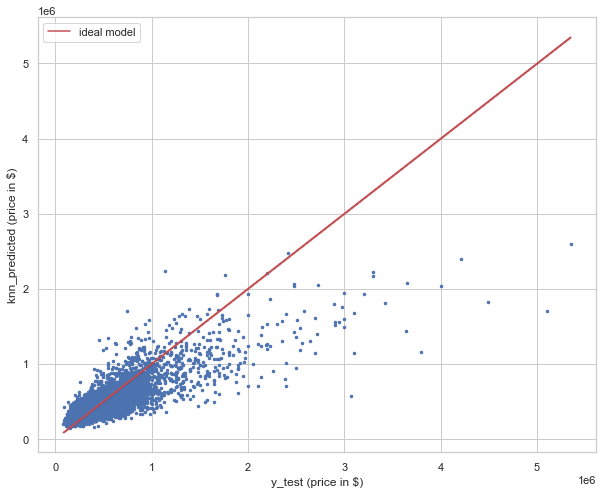

In [105]:
# generating value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, knn_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (price in $)');
plt.ylabel('knn_predicted (price in $)');

-------------

### 8. Results

- Our best performance was the first time we applied Linear Regression after pre-processing the data using Standar Scaler method and One Hot Encoding, with an accuracy score of 84,4% and a mean absolute error of 86280 dollars.
- However, after applying logarith transformation and normalizer by dummies we get a similar result with a 83,6% and a mean absolute error of 89111 dollars. 
- The first experiment before pre-processing had the result of 70%, so was improved through this methods.